<a href="https://colab.research.google.com/github/rharris9/SYSM578/blob/main/Rohan_PCA_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
!pip install researchpy --q
import pandas as pd
import numpy as np
import scipy as scipy
import researchpy as rp
import scipy.stats as stats
import plotly as pl
import matplotlib.pyplot as plt 
import warnings
from sklearn.preprocessing import StandardScaler 
from sklearn import manifold


Cancerdf = pd.read_table('https://raw.githubusercontent.com/rharris9/SYSM578/main/LIHC_BRCA_data1_Group.txt',sep='\t',header=(0))
Cancerdf.shape

Cancerdf.describe



<bound method NDFrame.describe of                      ID TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP  \
0                 Group                              LIHC_TP   
1            a100130426                                    0   
2            a100133144                                 2.31   
3            a100134869                                 5.69   
4                a10357                                138.3   
...                 ...                                  ...   
20527          ZYX|7791                                 4869   
20528       ZZEF1|23140                                 1366   
20529        ZZZ3|26009                                  783   
20530  psiTPTE22|387590                                    6   
20531       tAKR|389932                                   10   

      TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP  \
0                                  LIHC_TP   
1                                        0   
2                                    53.59   
3            

In [68]:
#fixing labels
Cancerlabels = Cancerdf.loc[[0]] 
Clabels = Cancerlabels.loc[0,:].values[1:]

CancerSamples = Cancerdf.loc[0] 
CancerSamples = list(Cancerdf)[1:] 

Cancerlabels = np.unique(Cancerdf) 
Cancerlabels = np.delete(Cancerlabels, np.where(Cancerlabels == 'Group')) 

Cancerdata1=Cancerdf.drop([0])
Cancerdata=Cancerdata1.drop(['ID'], axis=1) 
CancerdataT = Cancerdata.transpose()

CancerdataT

,1,2,3,4,5,6,7,8,9,10,...,20522,20523,20524,20525,20526,20527,20528,20529,20530,20531
TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP,0,2.31,5.69,138.3,1561,0,217,1,0,0,...,38,420,1219,28,766,4869,1366,783,6,10
TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP,0,53.59,5.41,144.07,1297,0,249,3,0,0,...,139,1284,2341,145,2030,10756,1533,1746,13,980
TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP,0,6.86,6.14,73.93,1423,0,336,1,0,0,...,22,342,1379,11,1129,3708,1606,412,3,3
TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT,0,2,0,103.92,1454,0,32,0,0,0,...,42,675,679,67,1942,2799,493,486,14,167
TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT,0,1.41,2.59,96.89,1125,0,7,0,0,0,...,24,522,863,8,947,1661,320,694,2,68
TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT,0,4.94,1.06,97.03,2128,0,63,0,0,0,...,44,1005,939,41,1852,4915,638,482,13,107
TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP,0,16.3644,12.9316,52.1503,408.076,0,1187.005,0,0,0,...,129.5917,1007.7824,1658.4983,258.4941,1208.3738,3507.2482,1894.9342,1180.4565,1.7233,0
TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP,0.9066,11.6228,9.2294,154.2974,1360.8341,0,592.0218,0,0,0,...,35.3581,533.9982,768.8123,331.8223,532.185,5458.7489,942.883,509.5195,35.3581,0
TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP,0,12.0894,11.0799,143.8643,865.5358,0,552.7513,0.4137,0,0,...,55.0269,437.7327,863.8808,175.4241,607.3645,5691.3529,781.1336,700.8688,66.6115,0
TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT,0,4.3333,3.9206,78.9238,978.4127,0,219.0476,0.9524,0,0,...,41.2698,433.3333,1034.2857,60.3175,745.0794,6455.873,1314.2857,968.254,265.3968,0.3175


Here we are scaling data in preparation for the analysis 

In [60]:

scaled = StandardScaler()
scaled.fit(CancerdataT) 
scaled_data1 = scaled.transform(CancerdataT) 


We now import necessary packages for plotting and preparing data for MDS &NMDS

In [64]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
mds = MDS(2,random_state=0)
XMDS = mds.fit_transform(scaled_data1)
nmds = manifold.MDS(n_components=2, random_state=0, metric=False, max_iter=3000)
XNMDS = nmds.fit_transform(scaled_data1)

Plotting MDS

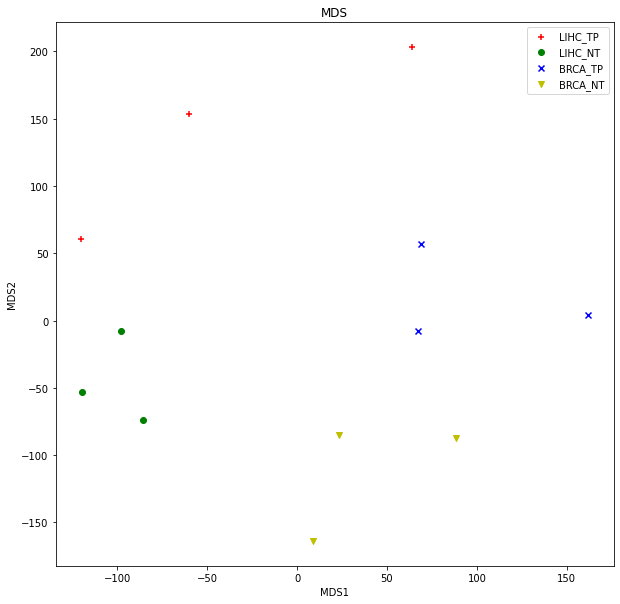

In [76]:

MDS1 = 0 
MDS2 = 1 

plt.figure(figsize=(10, 10))

for i in range(0, XMDS.shape[0]): 
  if Clabels[i] == 'LIHC_TP': 
    c1 = plt.scatter(XMDS[i,MDS1],XMDS[i,MDS2], c='r', marker='+') 

  elif Clabels[i] == 'LIHC_NT': 
    c2 = plt.scatter(XMDS[i,MDS1],XMDS[i,MDS2], c='g', marker='o') 

  elif Clabels[i] == 'BRCA_TP': 
    c3 = plt.scatter(XMDS[i,MDS1],XMDS[i,MDS2], c='b', marker='x') 

  elif Clabels[i] == 'BRCA_NT': 
    c4 = plt.scatter(XMDS[i,MDS1],XMDS[i,MDS2], c='y', marker='v') 


#adding labels
plt.legend([c1, c2, c3, c4],['LIHC_TP', 'LIHC_NT','BRCA_TP', 'BRCA_NT']) 

plt.xlabel('MDS1') 
plt.ylabel('MDS2') 
plt.title('MDS')
plt.show() 

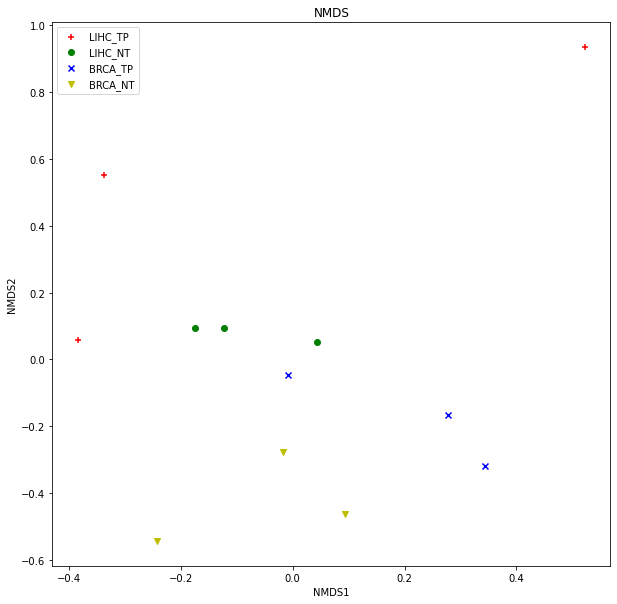

In [77]:
NMDS1 = 0 
NMDS2 = 1 

plt.figure(figsize=(10, 10))

for i in range(0, XNMDS.shape[0]): 
  if Clabels[i] == 'LIHC_TP': 
    c1 = plt.scatter(XNMDS[i,NMDS1],XNMDS[i,NMDS2], c='r', marker='+') 

  elif Clabels[i] == 'LIHC_NT': 
    c2 = plt.scatter(XNMDS[i,NMDS1],XNMDS[i,NMDS2], c='g', marker='o') 

  elif Clabels[i] == 'BRCA_TP': 
    c3 = plt.scatter(XNMDS[i,NMDS1],XNMDS[i,NMDS2], c='b', marker='x') 

  elif Clabels[i] == 'BRCA_NT': 
    c4 = plt.scatter(XNMDS[i,NMDS1],XNMDS[i,NMDS2], c='y', marker='v') 


#Add labels to PCA scatterplot:
plt.legend([c1, c2, c3, c4],['LIHC_TP', 'LIHC_NT', 'BRCA_TP', 'BRCA_NT']) 
plt.xlabel('NMDS1') 
plt.ylabel('NMDS2') 
plt.title('NMDS')
plt.show() 

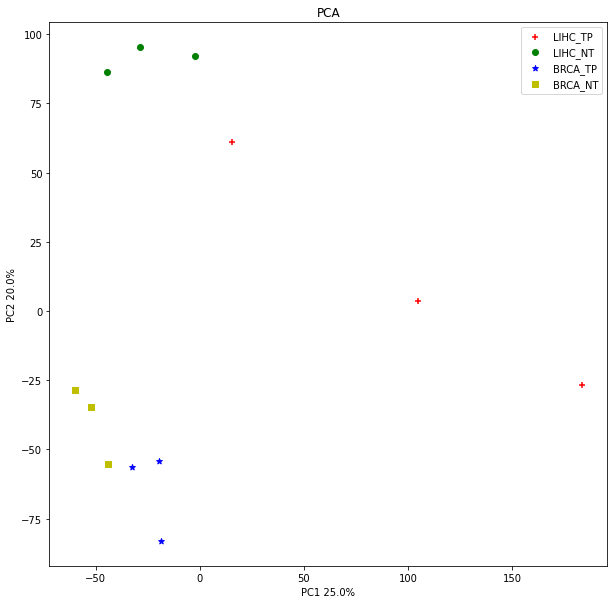

In [80]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2) 
pca.fit(scaled_data1) 
xpca = pca.transform(scaled_data1)

PC1 = 0 
PC2 = 1 

plt.figure(figsize=(10, 10))

for i in range(0, xpca.shape[0]): 
  if Clabels[i] == 'LIHC_TP': 
    c1 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='r', marker='+') 

  elif Clabels[i] == 'LIHC_NT': 
    c2 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='g', marker='o') 

  elif Clabels[i] == 'BRCA_TP': 
    c3 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='b', marker='*') 

  elif Clabels[i] == 'BRCA_NT': 
    c4 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='y', marker='s') 


#adding labels
plt.legend([c1, c2, c3, c4],['LIHC_TP', 'LIHC_NT','BRCA_TP', 'BRCA_NT']) 
plt.xlabel(f'PC1 {round(pca.explained_variance_ratio_[0],2)*100}%') 
plt.ylabel(f'PC2 {round(pca.explained_variance_ratio_[1],2)*100}%') 
plt.title('PCA')
plt.show() 